In [288]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Habiendo decidido por los datos de LEP, procedemos a analizar los resultados

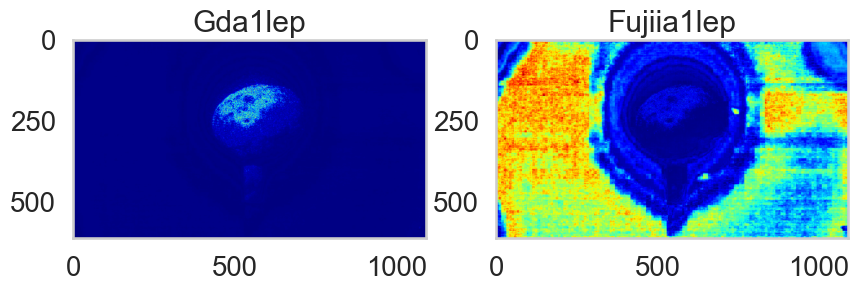

In [289]:
def Openbinaries(filename):
    with open(filename, 'rb' ) as f:
        data = np.fromfile(f, dtype=np.uint8).reshape(614,1092)
    return data

Gda1lep = Openbinaries('LEP/A1LEP_GD.bin')
Fujiia1lep = Openbinaries('LEP/A1LEP_Fujii.bin')

ax, fig = plt.subplots(1,2, figsize=(10,5))
fig[0].imshow(Gda1lep, cmap='jet')
fig[0].set_title('Gda1lep')
fig[0].grid(False)
fig[1].imshow(Fujiia1lep, cmap='jet')
fig[1].set_title('Fujiia1lep')
fig[1].grid(False)
plt.show()

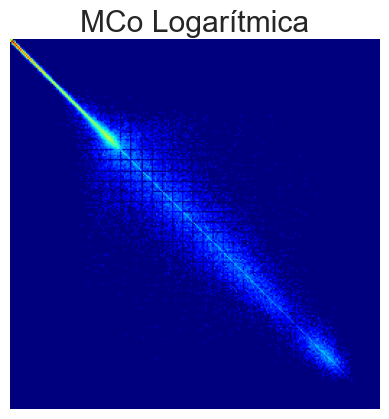

In [290]:
def Openyaml(filename, key = 'MCo', log = False, a = 255):
    # key tambien puede ser 'THSP'
    fs = cv2.FileStorage(filename, cv2.FILE_STORAGE_READ)
    data = fs.getNode(key).mat()
    fs.release()
    if log:
        data = np.log1p(data)*(a / np.log1p(data.max()))
    return data

A1Mco = Openyaml('LEP/A1LEP_MCo.yaml', log = True)

# Graficar
plt.imshow(A1Mco, cmap='jet')
plt.title('MCo Logarítmica')
plt.axis('off')
plt.show()

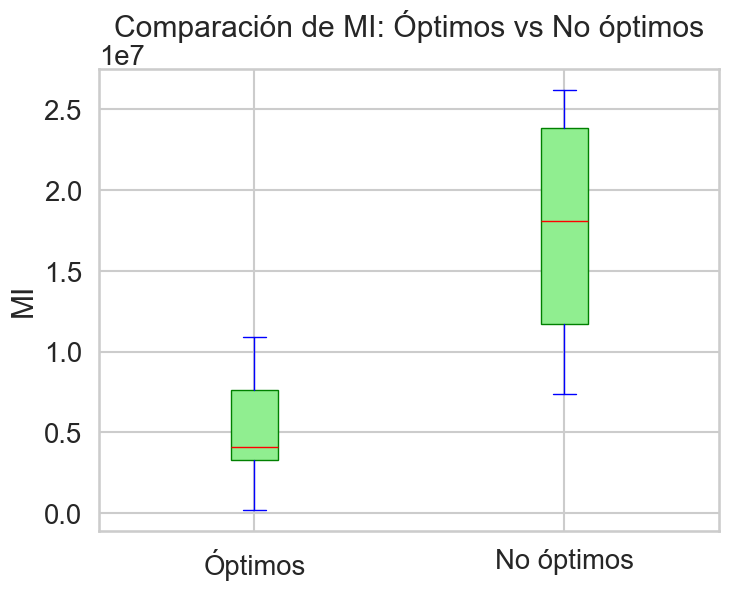

In [291]:
df = pd.read_csv('MIs.csv')
df_lep = pd.concat([df[27:45]],ignore_index=True)
df_lep
lep_optimos = pd.concat([df_lep[0:14]],ignore_index=True)
lep_NOoptimos = pd.concat([df_lep[14:18]],ignore_index=True)
plt.figure(figsize=(8,6))
plt.boxplot([lep_optimos['MI'], lep_NOoptimos['MI']],
            tick_labels=['Óptimos', 'No óptimos'],
            patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))
plt.title("Comparación de MI: Óptimos vs No óptimos")
plt.ylabel("MI")
plt.show()

In [292]:
data_LEP = {}
for i in range(1, 15):
    data_LEP[f"A{i}LEPGdBin"] = Openbinaries(f'LEP/A{i}LEP_GD.bin')
    data_LEP[f"A{i}LEPFujiiBin"] = Openbinaries(f'LEP/A{i}LEP_Fujii.bin')
    data_LEP[f"A{i}LEPMCoyaml"] = Openyaml(f'LEP/A{i}LEP_MCo.yaml')
    data_LEP[f"A{i}LEPTHSPyaml"] = Openyaml(f'LEP/A{i}LEP_THSP.yaml',key='THSP')
data_LEP["ARLEPGdBin"] = Openbinaries('LEP/ARLEP_GD.bin')
data_LEP["ARLEPFujiiBin"] = Openbinaries('LEP/ARLEP_Fujii.bin')
data_LEP["ARLEPMCoyaml"] = Openyaml('LEP/ARLEP_MCo.yaml')
data_LEP["ARLEPTHSPyaml"] = Openyaml('LEP/ARLEP_THSP.yaml',key='THSP')
data_LEP["avglepGdBin"] = Openbinaries('LEP/avglep_GD.bin')
data_LEP["avglepFujiiBin"] = Openbinaries('LEP/avglep_Fujii.bin')
data_LEP["avglepMCoyaml"] = Openyaml('LEP/avglep_MCo.yaml')
data_LEP["avglepTHSPyaml"] = Openyaml('LEP/avglep_THSP.yaml',key='THSP')
data_LEP["avlepGdBin"] = Openbinaries('LEP/avlep_GD.bin')
data_LEP["avlepFujiiBin"] = Openbinaries('LEP/avlep_Fujii.bin')
data_LEP["avlepMCoyaml"] = Openyaml('LEP/avlep_MCo.yaml')
data_LEP["avlepTHSPyaml"] = Openyaml('LEP/avlep_THSP.yaml',key='THSP')
data_LEP["AVMLEPGdBin"] = Openbinaries('LEP/AVMLEP_GD.bin')
data_LEP["AVMLEPFujiiBin"] = Openbinaries('LEP/AVMLEP_Fujii.bin')
data_LEP["AVMLEPMCoyaml"] = Openyaml('LEP/AVMLEP_MCo.yaml')
data_LEP["AVMLEPTHSPyaml"] = Openyaml('LEP/AVMLEP_THSP.yaml',key='THSP')


In [293]:
# Añadir nuevas columnas al DataFrame
df_lep['GdBin'] = df_lep['nombre'].apply(lambda x: data_LEP.get(f"{x}GdBin"))
df_lep['FujiiBin'] = df_lep['nombre'].apply(lambda x: data_LEP.get(f"{x}FujiiBin"))
df_lep['MCoyaml'] = df_lep['nombre'].apply(lambda x: data_LEP.get(f"{x}MCoyaml"))
df_lep['THSPyaml'] = df_lep['nombre'].apply(lambda x: data_LEP.get(f"{x}THSPyaml"))


In [294]:
df_lep['GdMean'] = df_lep['GdBin'].apply(lambda x: np.mean(x))
df_lep['GdStd'] = df_lep['GdBin'].apply(lambda x: np.std(x))
df_lep['FujiiMean'] = df_lep['FujiiBin'].apply(lambda x: np.mean(x))
df_lep['FujiiStd'] = df_lep['FujiiBin'].apply(lambda x: np.std(x))
df_lep['clase'] = ['óptimo'] * 14 + ['no óptimo'] * 4

In [295]:
df_lep.sample(3)

,nombre,MI,GdBin,FujiiBin,MCoyaml,THSPyaml,GdMean,GdStd,FujiiMean,FujiiStd,clase
2,A3LEP,1471510.0,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,...","[[22, 22, 22, 22, 17, 18, 17, 16, 16, 15, 12, ...","[[5950, 3850, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,...",3.183158,9.453910,124.058105,68.819782,óptimo
1,A2LEP,3402970.0,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,...","[[23, 23, 21, 21, 27, 25, 26, 26, 18, 19, 13, ...","[[3357, 2084, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,...",3.553752,11.829983,120.090242,73.266917,óptimo
12,A13LEP,5401320.0,"[[2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,...","[[18, 18, 20, 20, 17, 17, 15, 15, 18, 19, 18, ...","[[4661, 4714, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,...",3.931137,11.316809,133.003533,73.594579,óptimo


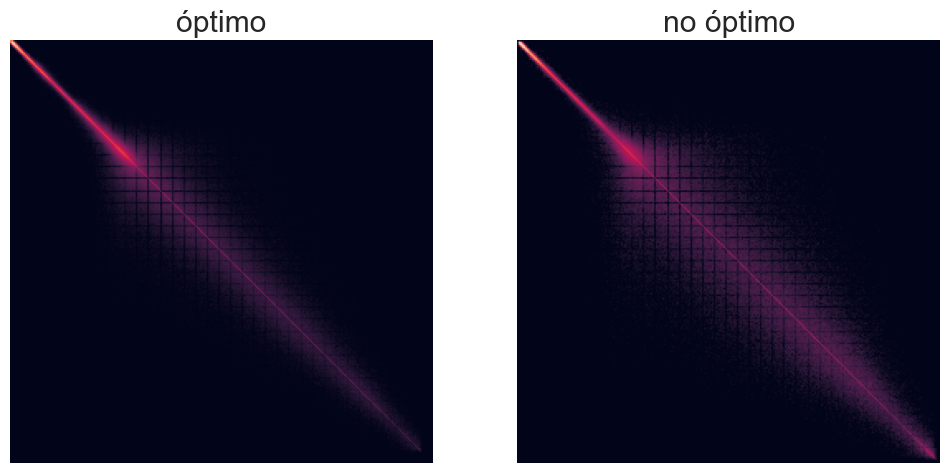

In [296]:
optimo = df_lep[df_lep['clase'] == 'óptimo']
no_optimo = df_lep[df_lep['clase'] == 'no óptimo']
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(np.log1p(optimo['MCoyaml'].mean()))
axs[0].axis('off')
axs[0].set_title('óptimo')
axs[1].imshow(np.log1p(no_optimo['MCoyaml'].mean()))
axs[1].axis('off')
axs[1].set_title('no óptimo')
plt.show()

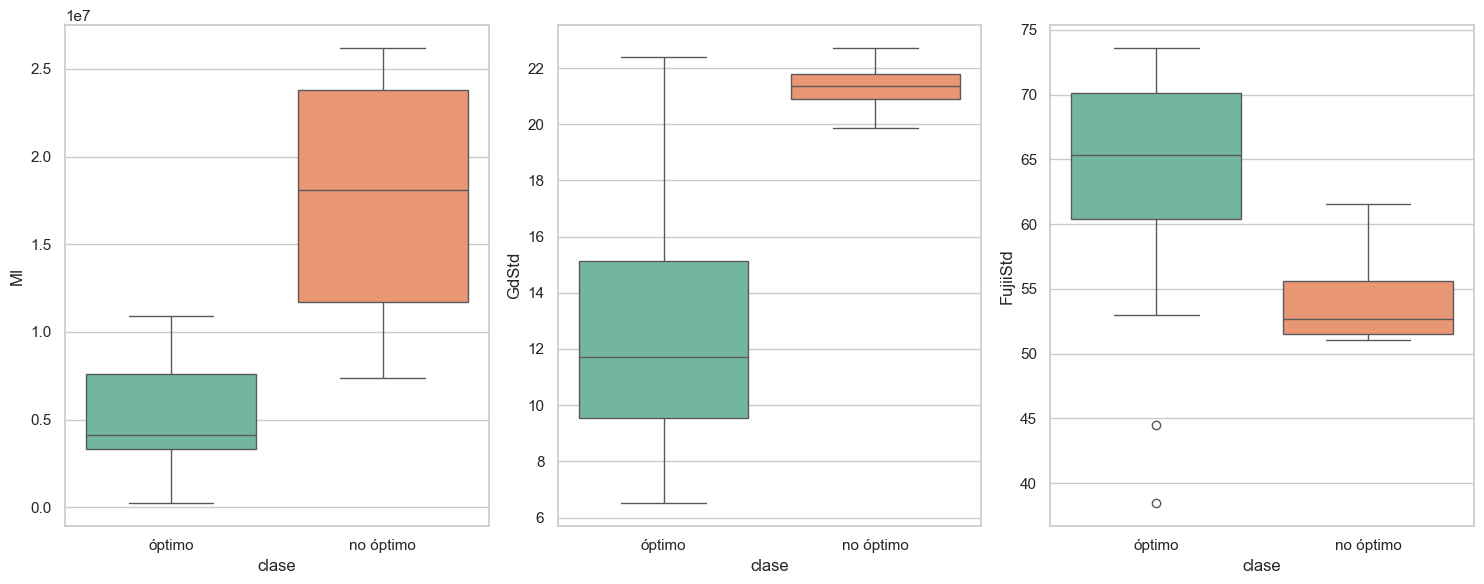

In [297]:
# Configuramos el estilo de Seaborn
sns.set_theme(style="whitegrid", palette="Set2")

columns = ['MI', 'GdStd', 'FujiiStd']

n_cols = 3
n_rows = int(np.ceil(len(columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(x='clase', y=col, data=df_lep, ax=axes[i],
                hue='clase', dodge=False, palette="Set2")
    # Remove the legend since hue isGdM/S redundant with x
    if axes[i].get_legend() is not None:
        axes[i].get_legend().remove()
        axes[i].set_title(f"{col} por clase", fontsize=14)
        axes[i].set_xlabel("")
        axes[i].set_ylabel(col, fontsize=12)

# Eliminar ejes sobrantes si existen
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

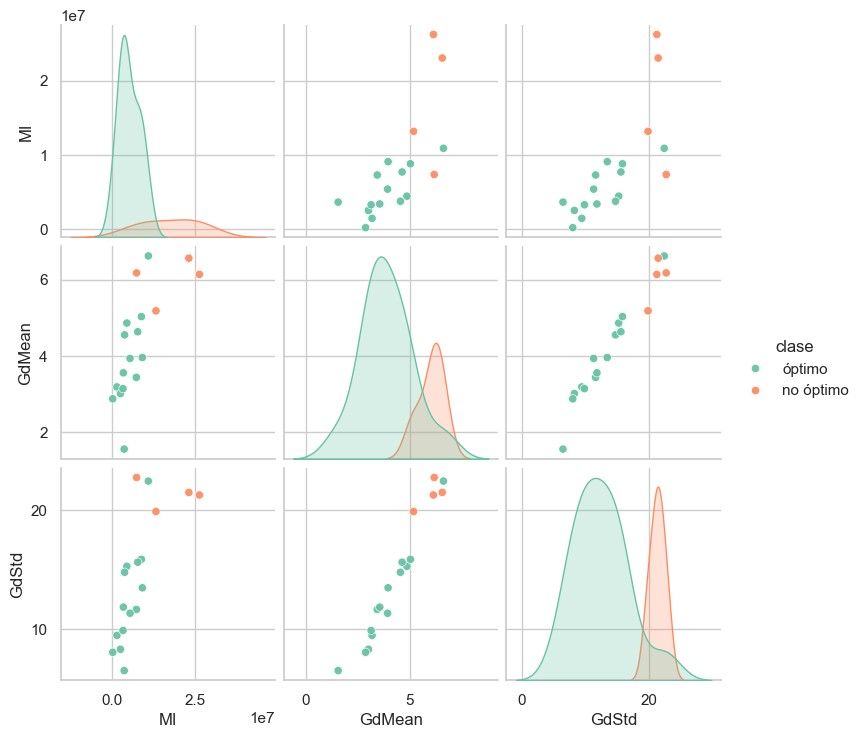

In [298]:
cols = ['MI', 'GdMean', 'GdStd']

grid = sns.pairplot(df_lep[cols + ['clase']], hue='clase', diag_kind='kde', plot_kws={'alpha':0.95})
sns.set_context("talk", font_scale=1.2)
sns.set_style("whitegrid")
plt.grid(True, color='black', zorder=0)
plt.show()

In [299]:
from scipy.stats import mannwhitneyu
variables = ['MI', 'GdMean', 'GdStd', 'FujiiMean', 'FujiiStd']

# Separar los grupos
optimo = df_lep[df_lep['clase'] == 'óptimo']
no_optimo = df_lep[df_lep['clase'] == 'no óptimo']

for var in variables:
    optimo_data = optimo[var]
    no_optimo_data = no_optimo[var]
    stat, p = mannwhitneyu(optimo_data, no_optimo_data, alternative='two-sided')
    print(f"Prueba U de Mann-Whitney para {var}:")
    print(f"Estadístico U = {stat:.2g}, p-valor = {p:.2g}")
    if p < 0.05:
        print(f"Resultado: Hay una diferencia significativa (p < 0.05).")
    else:
        print(f"Resultado: No hay evidencia de diferencia significativa (p >= 0.05).")
    print()

Prueba U de Mann-Whitney para MI:
Estadístico U = 4, p-valor = 0.0078
Resultado: Hay una diferencia significativa (p < 0.05).

Prueba U de Mann-Whitney para GdMean:
Estadístico U = 4, p-valor = 0.0078
Resultado: Hay una diferencia significativa (p < 0.05).

Prueba U de Mann-Whitney para GdStd:
Estadístico U = 3, p-valor = 0.0046
Resultado: Hay una diferencia significativa (p < 0.05).

Prueba U de Mann-Whitney para FujiiMean:
Estadístico U = 35, p-valor = 0.51
Resultado: No hay evidencia de diferencia significativa (p >= 0.05).

Prueba U de Mann-Whitney para FujiiStd:
Estadístico U = 44, p-valor = 0.1
Resultado: No hay evidencia de diferencia significativa (p >= 0.05).



In [300]:
from scipy.stats import shapiro, levene

# Lista de variables a analizar
variables = ['MI', 'GdMean', 'GdStd', 'FujiiMean', 'FujiiStd']


# Iterar sobre cada variable
for var in variables:
    print(f"--- Análisis para {var} ---")
    
    # Prueba de normalidad para el grupo óptimo
    stat_opt, p_opt = shapiro(optimo[var])
    # Prueba de normalidad para el grupo no óptimo
    stat_no_opt, p_no_opt = shapiro(no_optimo[var])
    print(f"Normalidad óptimo: p={p_opt:.2g}, no óptimo: p={p_no_opt:.2g}")
    
    # Prueba de homogeneidad de varianzas
    stat, p = levene(optimo[var], no_optimo[var])
    print(f"Homogeneidad de varianzas: p={p:.2g}")
    
    # Interpretación simple
    if p_opt > 0.05 and p_no_opt > 0.05:
        print("Resultado: Ambos grupos son normales (p >= 0.05).")
    else:
        print("Resultado: Al menos un grupo no es normal (p < 0.05).")
    
    if p > 0.05:
        print("Resultado: Las varianzas son homogéneas (p >= 0.05).")
    else:
        print("Resultado: Las varianzas no son homogéneas (p < 0.05).")
    
    print()  # Espacio para separar los resultados de cada variable

--- Análisis para MI ---
Normalidad óptimo: p=0.64, no óptimo: p=0.62
Homogeneidad de varianzas: p=0.0019
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas no son homogéneas (p < 0.05).

--- Análisis para GdMean ---
Normalidad óptimo: p=0.78, no óptimo: p=0.35
Homogeneidad de varianzas: p=0.19
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas son homogéneas (p >= 0.05).

--- Análisis para GdStd ---
Normalidad óptimo: p=0.44, no óptimo: p=0.86
Homogeneidad de varianzas: p=0.11
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas son homogéneas (p >= 0.05).

--- Análisis para FujiiMean ---
Normalidad óptimo: p=0.64, no óptimo: p=0.25
Homogeneidad de varianzas: p=0.16
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas son homogéneas (p >= 0.05).

--- Análisis para FujiiStd ---
Normalidad óptimo: p=0.041, no óptimo: p=0.12
Homogeneidad de varianzas: p=0.25
Resultado: Al menos un grupo no es norm

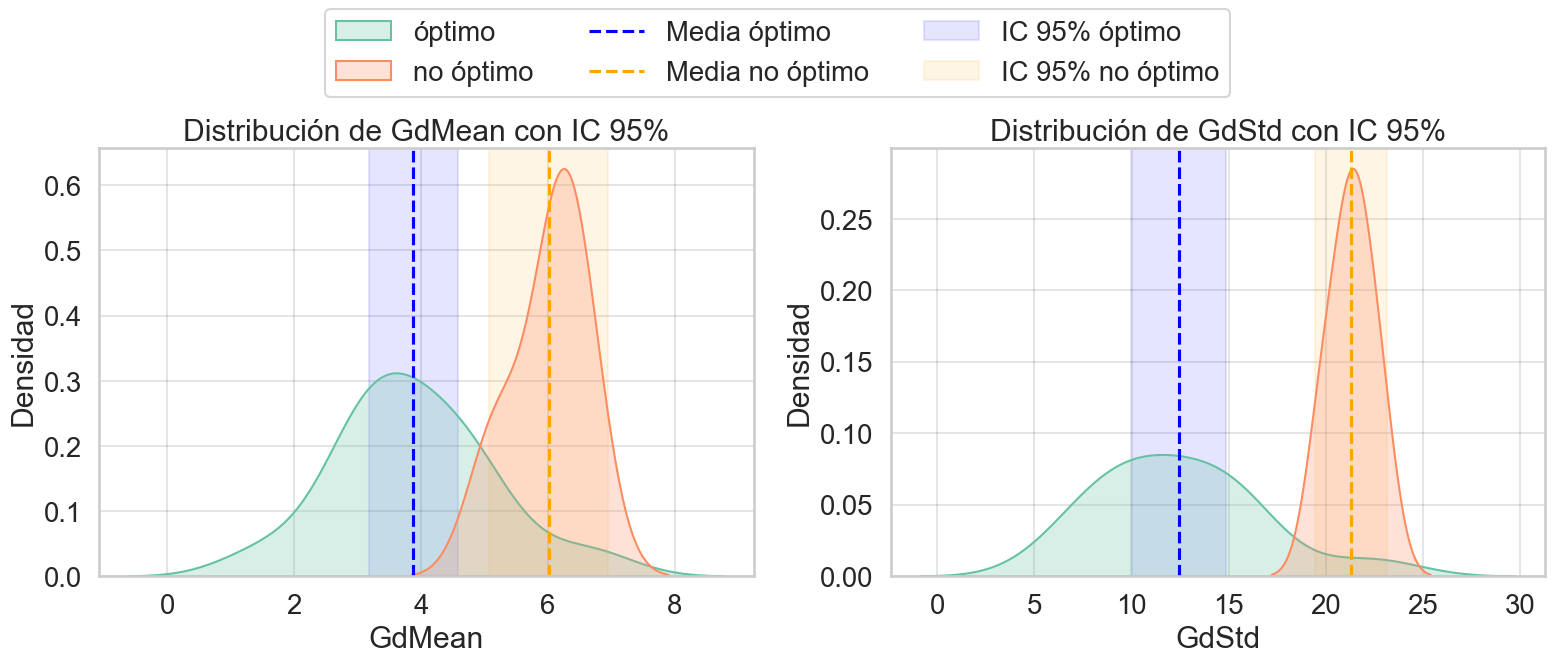

In [301]:
# Suponiendo que df_lep ya está definido
# Separar los grupos para GdMean y GdStd
optimo_GdMean = df_lep[df_lep['clase'] == 'óptimo']['GdMean']
no_optimo_GdMean = df_lep[df_lep['clase'] == 'no óptimo']['GdMean']
optimo_GdStd = df_lep[df_lep['clase'] == 'óptimo']['GdStd']
no_optimo_GdStd = df_lep[df_lep['clase'] == 'no óptimo']['GdStd']

# Función para calcular intervalos de confianza
def intervaloConf(data, confidence=0.95):
    n = len(data)
    mean = float(np.mean(data))
    stderr = float(np.std(data, ddof=1) / np.sqrt(n))
    margin = stderr * float(t.ppf((1 + confidence) / 2, n - 1))  # Corrección para IC positivo
    return [mean - margin, mean + margin]

# Calcular intervalos de confianza para GdMean y GdStd
ci_opt_GdMean = intervaloConf(optimo_GdMean)
ci_no_opt_GdMean = intervaloConf(no_optimo_GdMean)
ci_opt_GdStd = intervaloConf(optimo_GdStd)
ci_no_opt_GdStd = intervaloConf(no_optimo_GdStd)

# Crear figura con subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico para GdMean (izquierda)
sns.kdeplot(optimo_GdMean, fill=True, label='óptimo', ax=axes[0], zorder = 2)
sns.kdeplot(no_optimo_GdMean, fill=True, label='no óptimo', ax=axes[0], zorder = 2)
axes[0].grid(True, alpha = 0.1, color='black', zorder=0)
axes[0].axvline(np.mean(optimo_GdMean), color='blue', linestyle='--', label='Media óptimo')
axes[0].axvline(np.mean(no_optimo_GdMean), color='orange', linestyle='--', label='Media no óptimo')
axes[0].axvspan(ci_opt_GdMean[0], ci_opt_GdMean[1], alpha=0.1, color='blue', label='IC 95% óptimo')
axes[0].axvspan(ci_no_opt_GdMean[0], ci_no_opt_GdMean[1], alpha=0.1, color='orange', label='IC 95% no óptimo')
axes[0].set_title("Distribución de GdMean con IC 95%")
axes[0].set_xlabel("GdMean")
axes[0].set_ylabel("Densidad")

# Gráfico para GdStd (derecha)
sns.kdeplot(optimo_GdStd, fill=True, label='óptimo', ax=axes[1], zorder = 2)
sns.kdeplot(no_optimo_GdStd, fill=True, label='no óptimo', ax=axes[1], zorder = 2)
axes[1].grid(True, alpha = 0.1, color='black', zorder=0)
axes[1].axvline(np.mean(optimo_GdStd), color='blue', linestyle='--', label='Media óptimo')
axes[1].axvline(np.mean(no_optimo_GdStd), color='orange', linestyle='--', label='Media no óptimo')
axes[1].axvspan(ci_opt_GdStd[0], ci_opt_GdStd[1], alpha=0.1, color='blue', label='IC 95% óptimo')
axes[1].axvspan(ci_no_opt_GdStd[0], ci_no_opt_GdStd[1], alpha=0.1, color='orange', label='IC 95% no óptimo')
axes[1].set_title("Distribución de GdStd con IC 95%")
axes[1].set_xlabel("GdStd")
axes[1].set_ylabel("Densidad")

# Crear una única leyenda para ambos gráficos
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

Normalidad óptimo: p=0.64, no óptimo: p=0.62, normales si p >= 0.05
Homogeneidad de varianzas: p=0.0019, son homogéneas si p >= 0.05

Prueba t de Student para MI:
Estadístico t = -2.8, p-valor = 0.064
IC 95% óptimo: [3.3e+06, 7e+06] , no óptimo: [3.6e+06, 3.1e+07]


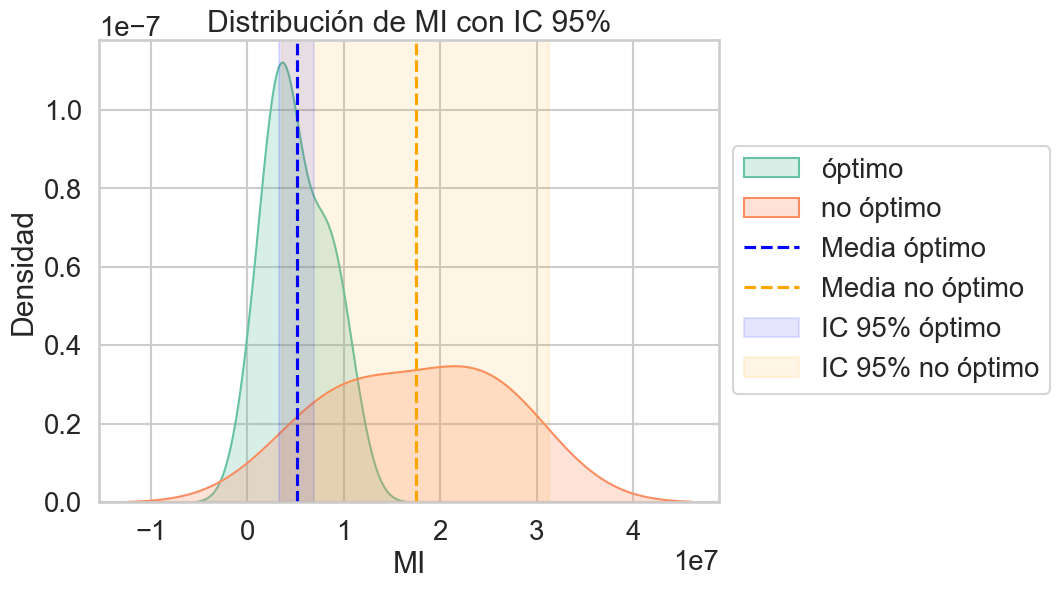

No hay evidencia de diferencia significativa en las medias de MI (p >= 0.05).


In [328]:
from scipy.stats import ttest_ind, t

# Separar los grupos
optimo = df_lep[df_lep['clase'] == 'óptimo']['MI']
no_optimo = df_lep[df_lep['clase'] == 'no óptimo']['MI']

# 1. Verificación de supuestos
# 1.1. Prueba de normalidad (Shapiro-Wilk)
stat_opt, p_opt = shapiro(optimo)
stat_no_opt, p_no_opt = shapiro(no_optimo)
print(f"Normalidad óptimo: p={p_opt:.2g}, no óptimo: p={p_no_opt:.2g}, normales si p >= 0.05")


# 1.2. Prueba de homogeneidad de varianzas (Levene)
stat, p = levene(optimo, no_optimo)
print(f"Homogeneidad de varianzas: p={p:.2g}, son homogéneas si p >= 0.05")

# 2. Prueba t de Student
equal_va = p > 0.05  # True si las varianzas son homogéneas
stat, p = ttest_ind(optimo, no_optimo, equal_var=equal_va)
print(f"\nPrueba t de Student para MI:")
print(f"Estadístico t = {stat:.2g}, p-valor = {p:.2g}")

# 3. Intervalos de confianza (95%)
ci_opt = intervaloConf(optimo)
ci_no_opt = intervaloConf(no_optimo)
print(f"IC 95% óptimo: [{ci_opt[0]:.2g}, {ci_opt[1]:.2g}] , no óptimo: [{ci_no_opt[0]:.2g}, {ci_no_opt[1]:.2g}]")


# 5. Visualización mejorada
plt.figure(figsize=(8,6))
sns.kdeplot(optimo, fill=True, label='óptimo')
sns.kdeplot(no_optimo, fill=True, label='no óptimo')

# Medias
plt.axvline(np.mean(optimo), color='blue', linestyle='--', label='Media óptimo')
plt.axvline(np.mean(no_optimo), color='orange', linestyle='--', label='Media no óptimo')

# Intervalos de confianza
plt.axvspan(ci_opt[0], ci_opt[1], alpha=0.1, color='blue', label='IC 95% óptimo')
plt.axvspan(ci_no_opt[0], ci_no_opt[1], alpha=0.1, color='orange', label='IC 95% no óptimo')

plt.title("Distribución de MI con IC 95%")
plt.xlabel("MI")
plt.ylabel("Densidad")
fig.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8), ncol=1)
plt.show()

# Interpretación final
if p < 0.05:
    print("Hay una diferencia significativa en las medias de MI entre los grupos (p < 0.05).")
else:
    print("No hay evidencia de diferencia significativa en las medias de MI (p >= 0.05).")

Precisión media con validación cruzada: 0.89
Precisiones por fold: [0.83333333 0.83333333 1.        ]

Precisión en el conjunto de prueba: 0.89
Matriz de confusión:
[[2 0]
 [1 6]]
Reporte de clasificación:
              precision    recall  f1-score   support

   no óptimo       0.67      1.00      0.80         2
      óptimo       1.00      0.86      0.92         7

    accuracy                           0.89         9
   macro avg       0.83      0.93      0.86         9
weighted avg       0.93      0.89      0.90         9



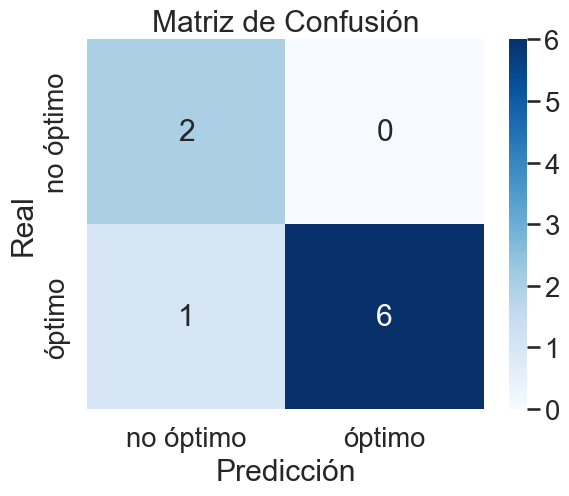

In [303]:
# Definir variables predictoras y objetivo
X = df_lep[['GdMean', 'GdStd']]  # Variables predictoras
y = df_lep['clase']              # Variable objetivo

# --- Paso 1: Validación Cruzada ---
# Crear el modelo de regresión logística
modelo = LogisticRegression()

# Realizar validación cruzada con 3 folds
scores = cross_val_score(modelo, X, y, cv=3)

# Imprimir resultados de validación cruzada
print(f"Precisión media con validación cruzada: {scores.mean():.2g}")
print(f"Precisiones por fold: {scores}")

# --- Paso 2: División y Evaluación con train_test_split ---
# Dividir los datos en entrenamiento (50%) y prueba (50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Imprimir métricas de evaluación
print(f"\nPrecisión en el conjunto de prueba: {accuracy_score(y_test, predicciones):.2g}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, predicciones))
print("Reporte de clasificación:")
print(classification_report(y_test, predicciones))


# Datos de tu matriz de confusión
cm = [[2, 0], [1, 6]]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no óptimo', 'óptimo'], yticklabels=['no óptimo', 'óptimo'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [304]:
optimo = df_lep[df_lep['clase'] == 'óptimo']
optimo.describe()

,MI,GdMean,GdStd,FujiiMean,FujiiStd
count,1.400000e+01,14.000000,14.000000,14.000000,14.000000
mean,5.142422e+06,3.879316,12.446510,96.882797,62.745093
std,3.149515e+06,1.219430,4.159573,33.551565,10.778339
min,2.200160e+05,1.552068,6.501486,27.758527,38.435856
25%,3.319412e+06,3.148734,9.558467,81.256066,60.379083
50%,4.110665e+06,3.742444,11.730125,101.055787,65.330586
75%,7.604952e+06,4.610024,15.131373,123.066140,70.146728
max,1.089200e+07,6.618217,22.409199,143.416911,73.594579


In [305]:
no_optimo = df_lep[df_lep['clase'] == 'no óptimo']
no_optimo.describe()

,MI,GdMean,GdStd,FujiiMean,FujiiStd
count,4.000000e+00,4.000000,4.000000,4.000000,4.000000
mean,1.744307e+07,6.012237,21.318252,82.775985,54.493402
std,8.713112e+06,0.587330,1.170674,18.474281,4.840460
min,7.365780e+06,5.179514,19.856959,56.193505,51.087669
25%,1.171984e+07,5.896465,20.896166,77.597675,51.515461
50%,1.810345e+07,6.154683,21.350572,88.780452,52.661904
75%,2.382668e+07,6.270455,21.772658,93.958762,55.639845
max,2.619960e+07,6.560068,22.714903,97.349532,61.562132


In [306]:
# Número de nuevas entradas
n_nuevas = 26

# Parámetros de las variables (media y desviación estándar)
params = {
    'MI': (17443070, 8713112),
    'GdMean': (6.012237, 0.587330),
    'GdStd': (21.318252, 1.170674),
    'FujiiMean': (82.775985, 18.474281),
    'FujiiStd': (54.493402, 4.840460)
}

# Generar datos aleatorios para cada variable
nuevos_datos = {}
for var, (mean, std) in params.items():
    nuevos_datos[var] = np.random.normal(mean*0.9, std*1.1, n_nuevas)

# Crear los nombres de las nuevas entradas (AV5LEP, A6LEP, ..., A30LEP)
nombres = [f"AV{i}LEP" for i in range(5, 31)]

# Crear un DataFrame con los nuevos datos
df_nuevos_n = pd.DataFrame(nuevos_datos)
df_nuevos_n['nombre'] = nombres
df_nuevos_n['clase'] = 'no óptimo'

# Reordenar las columnas para que coincidan con el DataFrame original
df_nuevos_n = df_nuevos_n[['nombre', 'MI', 'GdMean', 'GdStd', 'FujiiMean', 'FujiiStd', 'clase']]

# Agregar las nuevas entradas al DataFrame original
#df_lep_nuevo = pd.concat([df_lep, df_nuevos_n], ignore_index=True)

# Mostrar las nuevas entradas generadas
df_nuevos_n

,nombre,MI,GdMean,GdStd,FujiiMean,FujiiStd,clase
0,AV5LEP,1.876226e+07,6.741238,17.985075,54.453307,49.849531,no óptimo
1,AV6LEP,8.632249e+06,6.687552,17.765195,114.592535,45.091463,no óptimo
2,AV7LEP,2.125126e+07,5.549298,20.069895,90.377976,51.031034,no óptimo
3,AV8LEP,2.286139e+07,5.892840,19.768775,75.644377,42.070134,no óptimo
4,AV9LEP,2.172483e+07,5.679511,19.193182,100.586731,63.278423,no óptimo
5,AV10LEP,2.652445e+07,7.548898,18.842105,77.548894,53.215433,no óptimo
6,AV11LEP,2.571860e+07,6.254935,19.038522,88.724512,48.758679,no óptimo
7,AV12LEP,1.425985e+07,5.706957,20.034569,83.103998,47.781294,no óptimo
8,AV13LEP,9.207122e+06,5.814349,19.320048,96.017861,49.905483,no óptimo
9,AV14LEP,2.199179e+07,4.530308,20.291784,81.477501,50.524960,no óptimo


In [307]:
# Número de nuevas entradas
n_nuevas = 16

# Parámetros de las variables (media y desviación estándar)
params = {
    'MI': (5142422, 3149515),
    'GdMean': (3.879316, 1.219430),
    'GdStd': (12.446510, 4.159573),
    'FujiiMean': (96.882797, 33.551565),
    'FujiiStd': (62.745093, 10.778339)
}

# Generar datos aleatorios para cada variable
nuevos_datos = {}
for var, (mean, std) in params.items():
    nuevos_datos[var] = np.random.normal(mean, std, n_nuevas)

# Crear los nombres de las nuevas entradas (A15LEP a A30LEP)
nombres = [f"A{i}LEP" for i in range(15, 31)]

# Crear un DataFrame con los nuevos datos
df_nuevos_o = pd.DataFrame(nuevos_datos)
df_nuevos_o['nombre'] = nombres
df_nuevos_o['clase'] = 'óptimo'

# Reordenar las columnas para que coincidan con el DataFrame original
df_nuevos_o = df_nuevos_o[['nombre', 'MI', 'GdMean', 'GdStd', 'FujiiMean', 'FujiiStd', 'clase']]

# Agregar las nuevas entradas al DataFrame original
#df_lep = pd.concat([df_lep, df_nuevos_o], ignore_indx=True)

# Mostrar las nuevas entradas generadas
df_nuevos_o

,nombre,MI,GdMean,GdStd,FujiiMean,FujiiStd,clase
0,A15LEP,2.204983e+06,4.758426,17.488671,84.750934,64.758680,óptimo
1,A16LEP,9.433805e+06,3.453839,9.952451,162.343720,67.639449,óptimo
2,A17LEP,2.387675e+06,4.264172,12.639862,90.954016,64.865676,óptimo
3,A18LEP,1.668395e+06,5.622194,14.514912,59.853182,53.641647,óptimo
4,A19LEP,6.171288e+06,3.869642,9.242207,140.316591,71.719183,óptimo
5,A20LEP,6.566286e+06,2.673023,16.940399,111.833398,65.795992,óptimo
6,A21LEP,5.026351e+06,4.633469,11.805052,89.945311,54.292779,óptimo
7,A22LEP,7.084464e+06,4.277364,7.758101,59.708852,72.067468,óptimo
8,A23LEP,9.745436e+06,2.833304,17.502553,37.630870,52.411426,óptimo
9,A24LEP,2.707285e+06,2.475196,8.522663,136.489834,81.107463,óptimo


In [308]:
df_lep_nuevos = pd.concat([df_lep, df_nuevos_o, df_nuevos_n], ignore_index=True)
df_lep_nuevos = df_lep_nuevos.sort_values(by='clase', ascending=False)
df_lep_nuevos.sample(3)

,nombre,MI,GdBin,FujiiBin,MCoyaml,THSPyaml,GdMean,GdStd,FujiiMean,FujiiStd,clase
58,AV29LEP,1.912906e+07,NaN,NaN,NaN,NaN,5.792450,18.787231,67.767324,53.092914,no óptimo
24,A21LEP,5.026351e+06,NaN,NaN,NaN,NaN,4.633469,11.805052,89.945311,54.292779,óptimo
50,AV21LEP,2.665990e+06,NaN,NaN,NaN,NaN,5.667079,17.455085,51.125071,60.082325,no óptimo


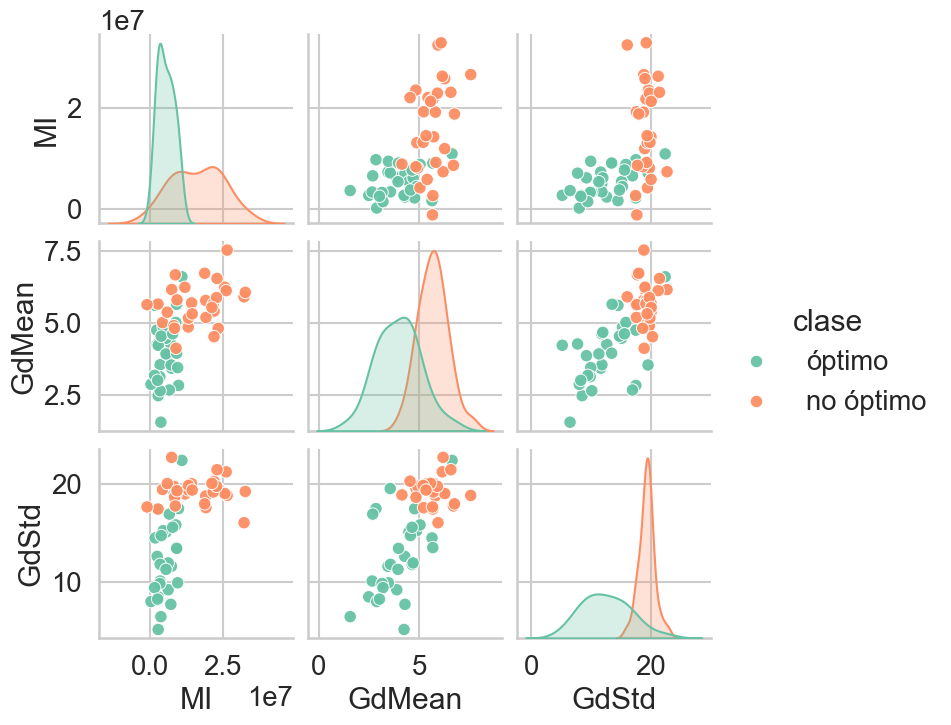

In [309]:
cols = ['MI', 'GdMean', 'GdStd']

grid = sns.pairplot(df_lep_nuevos[cols + ['clase']], hue='clase', diag_kind='kde', plot_kws={'alpha':0.95})
plt.show()

In [310]:
from scipy.stats import mannwhitneyu
variables = ['MI', 'GdMean', 'GdStd', 'FujiiMean', 'FujiiStd']

# Separar los grupos
optimo = df_lep_nuevos[df_lep_nuevos['clase'] == 'óptimo']
no_optimo = df_lep_nuevos[df_lep_nuevos['clase'] == 'no óptimo']

for var in variables:
    optimo_data = optimo[var]
    no_optimo_data = no_optimo[var]
    stat, p = mannwhitneyu(optimo_data, no_optimo_data, alternative='two-sided')
    print(f"Prueba U de Mann-Whitney para {var}:")
    print(f"Estadístico U = {stat:.2g}, p-valor = {p:.2g}")
    if p < 0.05:
        print(f"Resultado: Hay una diferencia significativa (p < 0.05).")
    else:
        print(f"Resultado: No hay evidencia de diferencia significativa (p >= 0.05).")
    print()

Prueba U de Mann-Whitney para MI:
Estadístico U = 1.2e+02, p-valor = 8.8e-07
Resultado: Hay una diferencia significativa (p < 0.05).

Prueba U de Mann-Whitney para GdMean:
Estadístico U = 79, p-valor = 4.3e-08
Resultado: Hay una diferencia significativa (p < 0.05).

Prueba U de Mann-Whitney para GdStd:
Estadístico U = 52, p-valor = 4.2e-09
Resultado: Hay una diferencia significativa (p < 0.05).

Prueba U de Mann-Whitney para FujiiMean:
Estadístico U = 6.4e+02, p-valor = 0.0056
Resultado: Hay una diferencia significativa (p < 0.05).

Prueba U de Mann-Whitney para FujiiStd:
Estadístico U = 7.6e+02, p-valor = 3.3e-06
Resultado: Hay una diferencia significativa (p < 0.05).



In [311]:
from scipy.stats import shapiro, levene

# Lista de variables a analizar
variables = ['MI', 'GdMean', 'GdStd', 'FujiiMean', 'FujiiStd']


# Iterar sobre cada variable
for var in variables:
    print(f"--- Análisis para {var} ---")
    
    # Prueba de normalidad para el grupo óptimo
    stat_opt, p_opt = shapiro(optimo[var])
    # Prueba de normalidad para el grupo no óptimo
    stat_no_opt, p_no_opt = shapiro(no_optimo[var])
    print(f"Normalidad óptimo: p={p_opt:.2g}, no óptimo: p={p_no_opt:.2g}")
    
    # Prueba de homogeneidad de varianzas
    stat, p = levene(optimo[var], no_optimo[var])
    print(f"Homogeneidad de varianzas: p={p:.2g}")
    
    # Interpretación simple
    if p_opt > 0.05 and p_no_opt > 0.05:
        print("Resultado: Ambos grupos son normales (p >= 0.05).")
    else:
        print("Resultado: Al menos un grupo no es normal (p < 0.05).")
    
    if p > 0.05:
        print("Resultado: Las varianzas son homogéneas (p >= 0.05).")
    else:
        print("Resultado: Las varianzas no son homogéneas (p < 0.05).")
    
    print()  # Espacio para separar los resultados de cada variable

--- Análisis para MI ---
Normalidad óptimo: p=0.33, no óptimo: p=0.5
Homogeneidad de varianzas: p=6.2e-08
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas no son homogéneas (p < 0.05).

--- Análisis para GdMean ---
Normalidad óptimo: p=0.96, no óptimo: p=0.98
Homogeneidad de varianzas: p=0.035
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas no son homogéneas (p < 0.05).

--- Análisis para GdStd ---
Normalidad óptimo: p=0.89, no óptimo: p=0.31
Homogeneidad de varianzas: p=7.4e-06
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas no son homogéneas (p < 0.05).

--- Análisis para FujiiMean ---
Normalidad óptimo: p=0.63, no óptimo: p=0.86
Homogeneidad de varianzas: p=0.00035
Resultado: Ambos grupos son normales (p >= 0.05).
Resultado: Las varianzas no son homogéneas (p < 0.05).

--- Análisis para FujiiStd ---
Normalidad óptimo: p=0.3, no óptimo: p=0.098
Homogeneidad de varianzas: p=0.013
Resultado: Ambos grupos so

Normalidad óptimo: p=0.96, no óptimo: p=0.98, normales si p >= 0.05
Homogeneidad de varianzas: p=0.035, son homogéneas si p >= 0.05

Prueba t de Student para GdMean:
Estadístico t = -7.1, p-valor = 3.4e-09
IC 95% óptimo: [3.5, 4.4] , no óptimo: [5.4, 5.9]


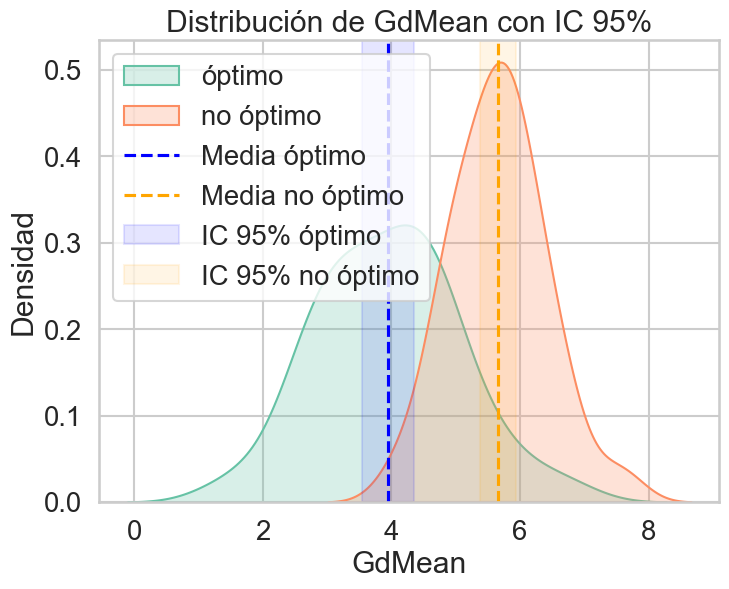

Hay una diferencia significativa en las medias de GdMean entre los grupos (p < 0.05).


In [312]:
from scipy.stats import ttest_ind, t

# Separar los grupos
optimo = df_lep_nuevos[df_lep_nuevos['clase'] == 'óptimo']['GdMean']
no_optimo = df_lep_nuevos[df_lep_nuevos['clase'] == 'no óptimo']['GdMean']

# 1. Verificación de supuestos
# 1.1. Prueba de normalidad (Shapiro-Wilk)
stat_opt, p_opt = shapiro(optimo)
stat_no_opt, p_no_opt = shapiro(no_optimo)
print(f"Normalidad óptimo: p={p_opt:.2g}, no óptimo: p={p_no_opt:.2g}, normales si p >= 0.05")

# 1.2. Prueba de homogeneidad de varianzas (Levene)
stat, p = levene(optimo, no_optimo)
print(f"Homogeneidad de varianzas: p={p:.2g}, son homogéneas si p >= 0.05")

# 2. Prueba t de Student
equal_va = p > 0.05  # True si las varianzas son homogéneas
stat, p = ttest_ind(optimo, no_optimo, equal_var=equal_va)
print(f"\nPrueba t de Student para GdMean:")
print(f"Estadístico t = {stat:.2g}, p-valor = {p:.2g}")

# 3. Intervalos de confianza (95%)

ci_opt = intervaloConf(optimo)
ci_no_opt = intervaloConf(no_optimo)
print(f"IC 95% óptimo: [{ci_opt[0]:.2g}, {ci_opt[1]:.2g}] , no óptimo: [{ci_no_opt[0]:.2g}, {ci_no_opt[1]:.2g}]")

# 5. Visualización mejorada
plt.figure(figsize=(8,6))
sns.kdeplot(optimo, fill=True, label='óptimo')
sns.kdeplot(no_optimo, fill=True, label='no óptimo')

# Medias
plt.axvline(np.mean(optimo), color='blue', linestyle='--', label='Media óptimo')
plt.axvline(np.mean(no_optimo), color='orange', linestyle='--', label='Media no óptimo')

# Intervalos de confianza
plt.axvspan(ci_opt[0], ci_opt[1], alpha=0.1, color='blue', label='IC 95% óptimo')
plt.axvspan(ci_no_opt[0], ci_no_opt[1], alpha=0.1, color='orange', label='IC 95% no óptimo')

plt.title("Distribución de GdMean con IC 95%")
plt.xlabel("GdMean")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Interpretación final
if p < 0.05:
    print("Hay una diferencia significativa en las medias de GdMean entre los grupos (p < 0.05).")
else:
    print("No hay evidencia de diferencia significativa en las medias de GdMean (p >= 0.05).")

Normalidad óptimo: p=0.89, no óptimo: p=0.31, normales si p >= 0.05
Homogeneidad de varianzas: p=7.4e-06, son homogéneas si p >= 0.05

Prueba t de Student para GdStd:
Estadístico t = -8.7, p-valor = 2.7e-10
IC 95% óptimo: [11, 14] , no óptimo: [19, 20]


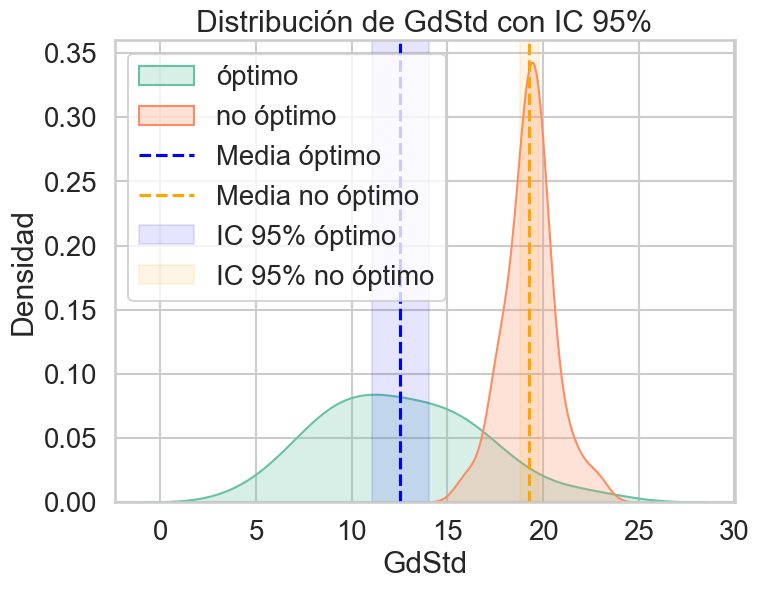

Hay una diferencia significativa en las medias de GdStd entre los grupos (p < 0.05).


In [313]:
from scipy.stats import ttest_ind, t

# Separar los grupos
optimo = df_lep_nuevos[df_lep_nuevos['clase'] == 'óptimo']['GdStd']
no_optimo = df_lep_nuevos[df_lep_nuevos['clase'] == 'no óptimo']['GdStd']

# 1. Verificación de supuestos
# 1.1. Prueba de normalidad (Shapiro-Wilk)
stat_opt, p_opt = shapiro(optimo)
stat_no_opt, p_no_opt = shapiro(no_optimo)
print(f"Normalidad óptimo: p={p_opt:.2g}, no óptimo: p={p_no_opt:.2g}, normales si p >= 0.05")

# 1.2. Prueba de homogeneidad de varianzas (Levene)
stat, p = levene(optimo, no_optimo)
print(f"Homogeneidad de varianzas: p={p:.2g}, son homogéneas si p >= 0.05")

# 2. Prueba t de Student
equal_va = p > 0.05  # True si las varianzas son homogéneas
stat, p = ttest_ind(optimo, no_optimo, equal_var=equal_va)
print(f"\nPrueba t de Student para GdStd:")
print(f"Estadístico t = {stat:.2g}, p-valor = {p:.2g}")

# 3. Intervalos de confianza (95%)

ci_opt = intervaloConf(optimo)
ci_no_opt = intervaloConf(no_optimo)
print(f"IC 95% óptimo: [{ci_opt[0]:.2g}, {ci_opt[1]:.2g}] , no óptimo: [{ci_no_opt[0]:.2g}, {ci_no_opt[1]:.2g}]")

# 5. Visualización mejorada
plt.figure(figsize=(8,6))
sns.kdeplot(optimo, fill=True, label='óptimo')
sns.kdeplot(no_optimo, fill=True, label='no óptimo')

# Medias
plt.axvline(np.mean(optimo), color='blue', linestyle='--', label='Media óptimo')
plt.axvline(np.mean(no_optimo), color='orange', linestyle='--', label='Media no óptimo')

# Intervalos de confianza
plt.axvspan(ci_opt[0], ci_opt[1], alpha=0.1, color='blue', label='IC 95% óptimo')
plt.axvspan(ci_no_opt[0], ci_no_opt[1], alpha=0.1, color='orange', label='IC 95% no óptimo')

plt.title("Distribución de GdStd con IC 95%")
plt.xlabel("GdStd")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Interpretación final
if p < 0.05:
    print("Hay una diferencia significativa en las medias de GdStd entre los grupos (p < 0.05).")
else:
    print("No hay evidencia de diferencia significativa en las medias de GdStd (p >= 0.05).")

Normalidad óptimo: p=0.33, no óptimo: p=0.5, normales si p >= 0.05
Homogeneidad de varianzas: p=6.2e-08, son homogéneas si p >= 0.05

Prueba t de Student para MI:
Estadístico t = -6.4, p-valor = 2.1e-07
IC 95% óptimo: [4.2e+06, 6.4e+06] , no óptimo: [1.3e+07, 2e+07]


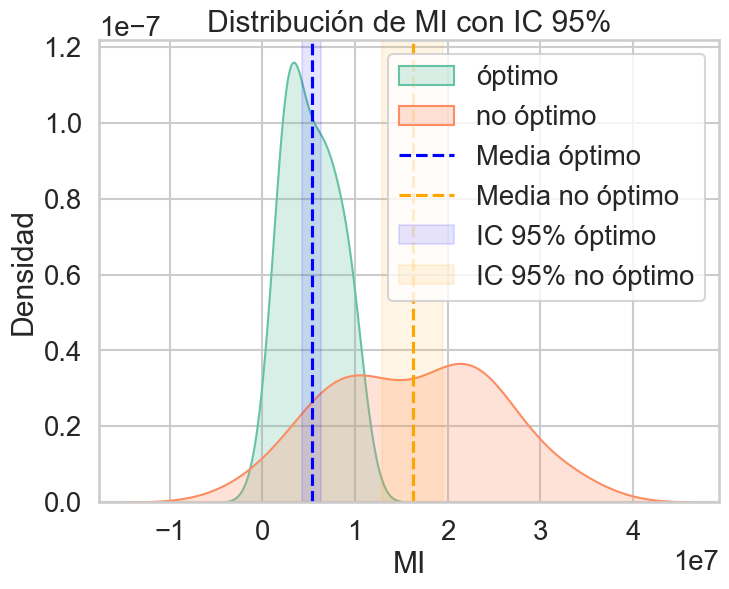

Hay una diferencia significativa en las medias de MI entre los grupos (p < 0.05).


In [314]:
from scipy.stats import ttest_ind, t

# Separar los grupos
optimo = df_lep_nuevos[df_lep_nuevos['clase'] == 'óptimo']['MI']
no_optimo = df_lep_nuevos[df_lep_nuevos['clase'] == 'no óptimo']['MI']

# 1. Verificación de supuestos
# 1.1. Prueba de normalidad (Shapiro-Wilk)
stat_opt, p_opt = shapiro(optimo)
stat_no_opt, p_no_opt = shapiro(no_optimo)
print(f"Normalidad óptimo: p={p_opt:.2g}, no óptimo: p={p_no_opt:.2g}, normales si p >= 0.05")

# 1.2. Prueba de homogeneidad de varianzas (Levene)
stat, p = levene(optimo, no_optimo)
print(f"Homogeneidad de varianzas: p={p:.2g}, son homogéneas si p >= 0.05")

# 2. Prueba t de Student
equal_va = p > 0.05  # True si las varianzas son homogéneas
stat, p = ttest_ind(optimo, no_optimo, equal_var=equal_va)
print(f"\nPrueba t de Student para MI:")
print(f"Estadístico t = {stat:.2g}, p-valor = {p:.2g}")

# 3. Intervalos de confianza (95%)

ci_opt = intervaloConf(optimo)
ci_no_opt = intervaloConf(no_optimo)
print(f"IC 95% óptimo: [{ci_opt[0]:.2g}, {ci_opt[1]:.2g}] , no óptimo: [{ci_no_opt[0]:.2g}, {ci_no_opt[1]:.2g}]")

# 5. Visualización mejorada
plt.figure(figsize=(8,6))
sns.kdeplot(optimo, fill=True, label='óptimo')
sns.kdeplot(no_optimo, fill=True, label='no óptimo')

# Medias
plt.axvline(np.mean(optimo), color='blue', linestyle='--', label='Media óptimo')
plt.axvline(np.mean(no_optimo), color='orange', linestyle='--', label='Media no óptimo')

# Intervalos de confianza
plt.axvspan(ci_opt[0], ci_opt[1], alpha=0.1, color='blue', label='IC 95% óptimo')
plt.axvspan(ci_no_opt[0], ci_no_opt[1], alpha=0.1, color='orange', label='IC 95% no óptimo')

plt.title("Distribución de MI con IC 95%")
plt.xlabel("MI")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Interpretación final
if p < 0.05:
    print("Hay una diferencia significativa en las medias de MI entre los grupos (p < 0.05).")
else:
    print("No hay evidencia de diferencia significativa en las medias de MI (p >= 0.05).")

In [315]:
# Comparación de boxplots y histogramas de las distribuciones de MI

# le = pd.concat([df[0:18]],ignore_index=True)
# lep = pd.concat([df[27:45]],ignore_index=True)
# verdes = pd.concat([df[15:18], df[26:27], df[42:45], df[53:54]], ignore_index=True)
# rojos = pd.concat([df[14:15], df[25:26], df[41:42], df[52:53]] , ignore_index=True)
# abajo = pd.concat([df[18:27], df[45:54]], ignore_index=True)
# noabajo = pd.concat([df[0:18], df[27:45]], ignore_index=True)

# Extraer la serie 'MI' de cada DataFrame y organizarlas en un diccionario
datasets = {
    #'Todos' : df['MI'],
    'le': le['MI'],
    'lep': lep['MI'],
    #'verdes': verdes['MI'],
    #'rojos': rojos['MI'],
    #'abajo': abajo['MI'],
    #'noabajo': noabajo['MI']
}

# Boxplots: dibujar todos los boxplots en una única gráfica para comparar
plt.figure(figsize=(10, 6))
plt.boxplot(list(datasets.values()), labels=list(datasets.keys()))
plt.title("Comparación de Boxplots")
plt.ylabel("MI")
plt.show()

# Histogramas: dibujar los histogramas superpuestos de cada grupo
plt.figure(figsize=(10, 6))
for name, data in datasets.items():
    plt.hist(data, bins='sturges', alpha=0.5, label=name)
plt.title("Comparación de Histogramas")
plt.xlabel("MI")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

NameError: name 'le' is not defined

Ajuste Lognormal:
  shape = 0.69, loc = -1.4e+06, scale = 7.4e+06
  KS statistic = 0.097, p-value = 0.99



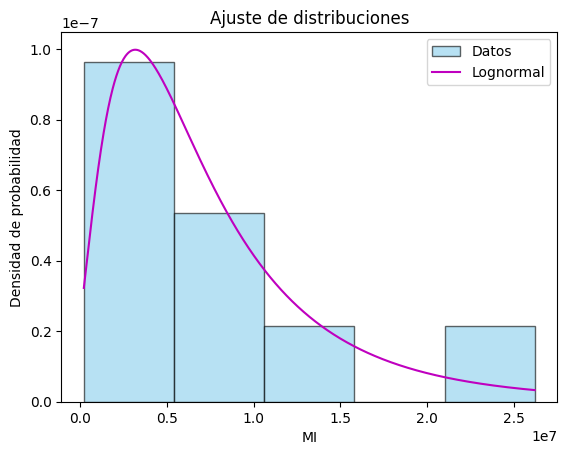

In [ ]:
# Supongamos que tus datos están en un array llamado 'data'
data = lep['MI'].values

# # Ajustar la distribución normal
# mu, std = stats.norm.fit(data)
# ks_norm = stats.kstest(data, 'norm', args=(mu, std))
# print("Ajuste Normal:")
# print(f"  mu = {mu:.2g}, std = {std:.2g}")
# print(f"  Variance = {(std**2):.2g}")
# print(f"  KS statistic = {ks_norm.statistic:.2g}, p-value = {ks_norm.pvalue:.2g}\n")
# Ajustar la distribución Lognormal
shape_ln, loc_ln, scale_ln = stats.lognorm.fit(data)
ks_lognorm = stats.kstest(data, 'lognorm', args=(shape_ln, loc_ln, scale_ln))
print("Ajuste Lognormal:")
print(f"  shape = {shape_ln:.2g}, loc = {loc_ln:.2g}, scale = {scale_ln:.2g}")
print(f"  KS statistic = {ks_lognorm.statistic:.2g}, p-value = {ks_lognorm.pvalue:.2g}\n")

# Crear un rango de valores para graficar las densidades
x = np.linspace(np.min(data), np.max(data), 1000)

# Calcular las densidades de probabilidad para cada ajuste
#pdf_norm   = stats.norm.pdf(x, mu, std)
pdf_lognorm= stats.lognorm.pdf(x, shape_ln, loc_ln, scale_ln)

# Graficar el histograma y las distribuciones ajustadas

plt.hist(data, bins = 5, density=True, alpha=0.6,
         color='skyblue', edgecolor='black', label="Datos")
#plt.plot(x, pdf_norm,   'r-', label='Normal')
plt.plot(x, pdf_lognorm,'m-', label='Lognormal')
plt.xlabel('MI')
plt.ylabel('Densidad de probabilidad')
plt.title('Ajuste de distribuciones')
plt.legend()
plt.show()
